<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
#creating list of lists
import csv
with open('sat_scores.csv', mode='r') as file:
    reader = csv.reader(file)
    satlist = []
    for row in reader:
        satlist.append(row)
print (satlist)


[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

In [3]:
# creating a dictionary form the lists
satdct={}
for value, key in enumerate(satlist[0]):
    satdct[key]= []
    for num in satlist[1:]:
        satdct[key].append(num[value])
print(satdct)

{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
make_dataframe_from_dict = pd.DataFrame.from_dict(satdct) 
type(make_dataframe_from_dict)
make_dataframe_from_dict.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [5]:
sat = pd.read_csv('sat_scores.csv')
sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [6]:
#as we can see above making a dataframe from the SAT dictionary prodcues a dataframe made
# of all columns as objects while using the pd.read will produce a dataframe with appropriate
# data types as integers for numbers where possible.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
#It describes each US state and rate of sitting for the Sat and average math and verbal scores

In [8]:
sat. head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [9]:
sat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   52 non-null     object
 1   Rate    52 non-null     int64 
 2   Verbal  52 non-null     int64 
 3   Math    52 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


In [10]:
sat.shape

(52, 4)

In [11]:
datadictionary = {'description of data':{'State': 'String for each state within the US',
              'Rate':'Integer for participation rate in a state',
              'Verbal':'Integer for average verbal score',
               'Math':'Integer for average math score'}}
datadictionary

{'description of data': {'State': 'String for each state within the US',
  'Rate': 'Integer for participation rate in a state',
  'Verbal': 'Integer for average verbal score',
  'Math': 'Integer for average math score'}}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">
## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


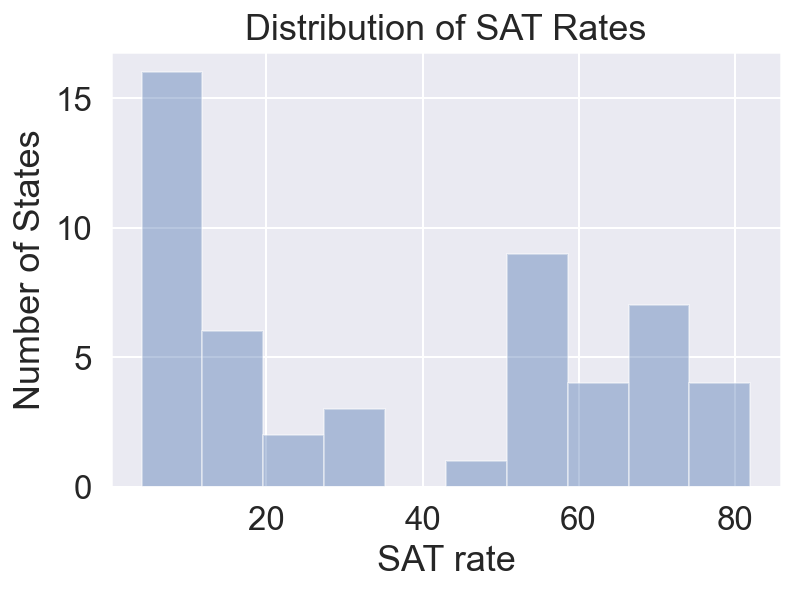

In [13]:
satc1 = sns.distplot(sat['Rate'], kde=False, bins=10,axlabel='SAT rate')
satc1.set(ylabel='Number of States')
satc1.set_title('Distribution of SAT Rates');

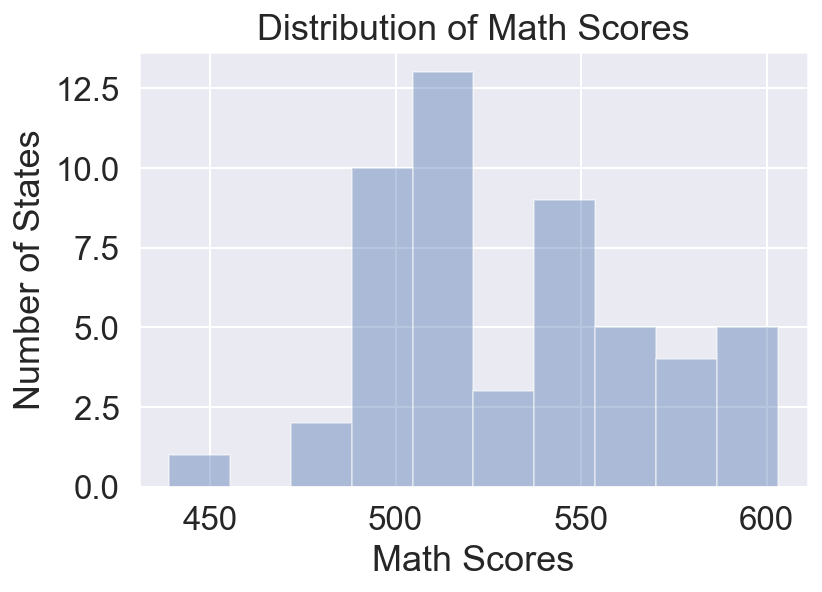

In [14]:
satc2 = sns.distplot(sat['Math'], kde=False, bins=10,axlabel='Math Scores')
satc2.set(ylabel='Number of States')
satc2.set_title('Distribution of Math Scores');

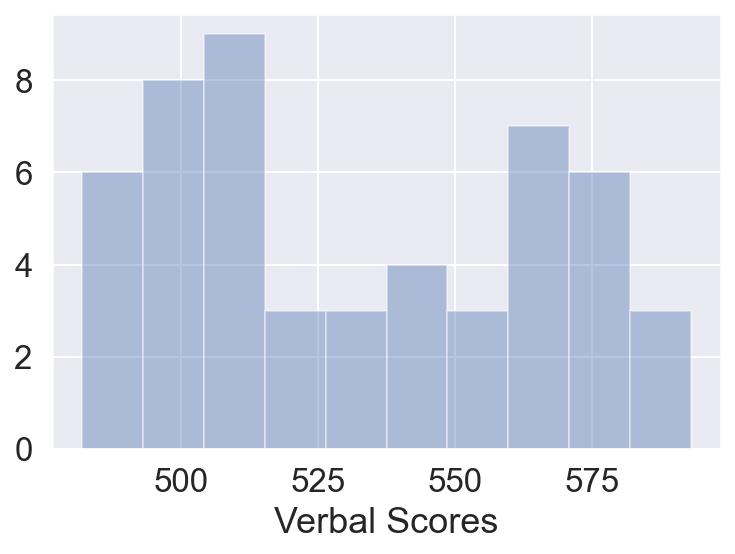

In [15]:
satc3 = sns.distplot(sat['Verbal'], kde=False, bins=10,axlabel='Verbal Scores')
satc2.set(ylabel='Number of States')
satc2.set_title('Distribution of Verbal Scores');

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

Positive and strong  relationship between Math and Verbal;  Fairly Negative but weaker relationship between Math and Rate and Verbal and Rate.
we have several scatterplots showing the realtionship between 2 variables.

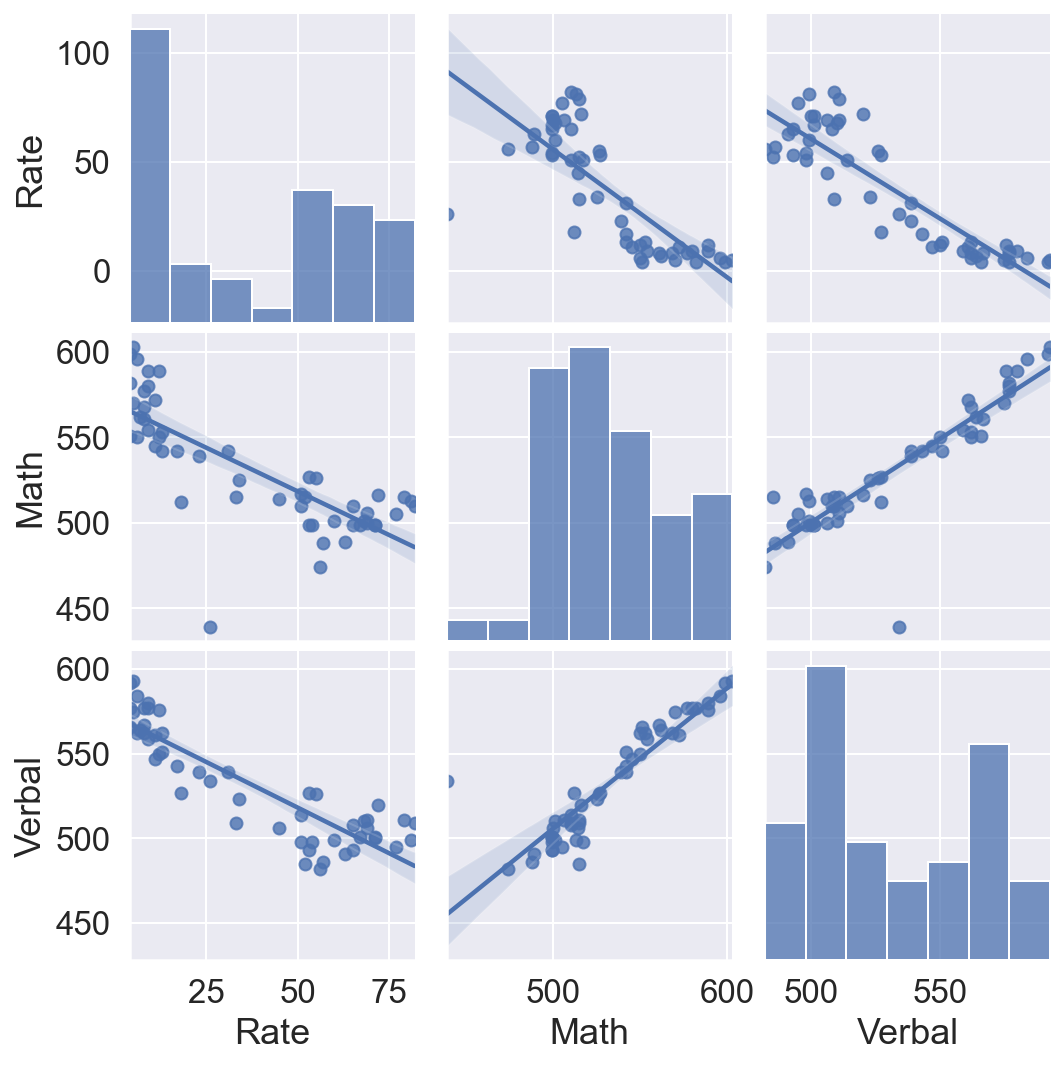

In [16]:
g = sns.pairplot(sat,vars=['Rate',"Math",'Verbal'], kind = "reg")

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

[Text(0, 0.5, 'Num. States'), Text(0.5, 0, 'Score')]

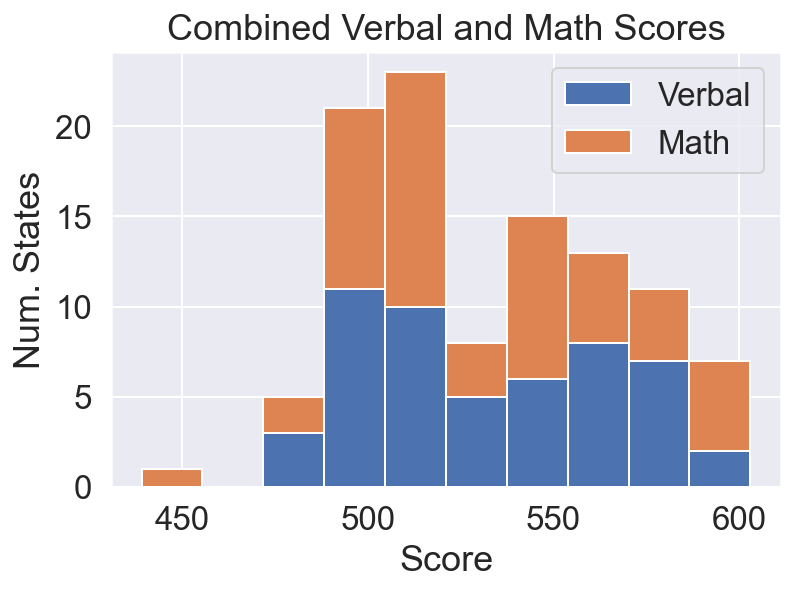

In [17]:
satplot = sat[['Verbal','Math']].plot.hist(stacked=True)
satplot.set_title('Combined Verbal and Math Scores')
satplot.set(ylabel='Num. States',xlabel='Score')

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

In [18]:
# Benefits 1) boxplots show outliers and show a variable's symmetry and skewness at once. What is more, makes variables comparable
# Why not Rate: It has a different scale and would not be suitable in this instance. It's a percentage would lead to misleading comparisons among variables.

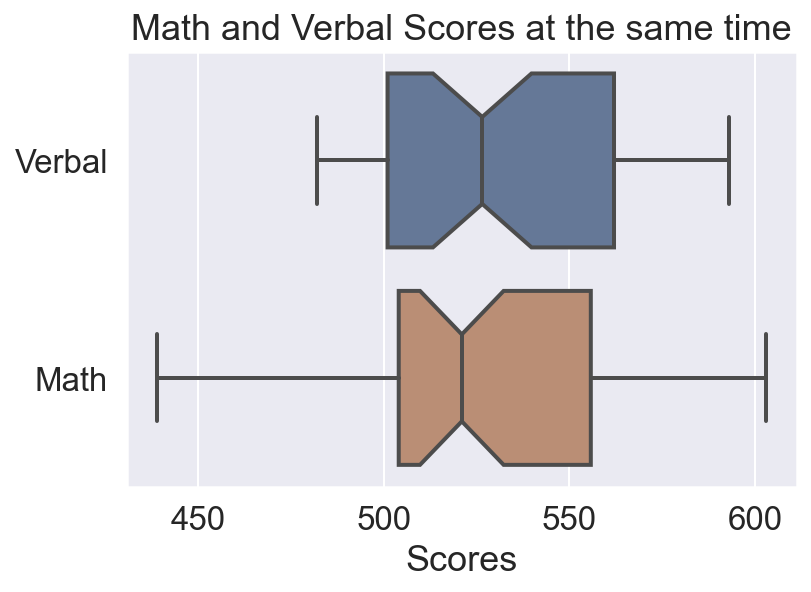

In [19]:
var_to_plot = ['Verbal','Math']
fig, ax = plt.subplots(figsize=(6, 4))
fig2 = sns.boxplot(data=sat[var_to_plot], orient='h', fliersize=2, linewidth=2, notch=True,
            saturation=0.5, ax=ax)
fig2.set(xlabel = "Scores")
ax.set_title('Math and Verbal Scores at the same time')
plt.show;

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [20]:
# def var_standardized(var):
#     var_stand = (var-var.mean())/var.std()
#     return var_stand
# Standardizing the variables as per fromula above to make the 3 comparable

In [21]:
norm_sat= (sat-sat.mean())/sat.std()

In [22]:
var_to_plot2 = ['Verbal','Math','Rate']

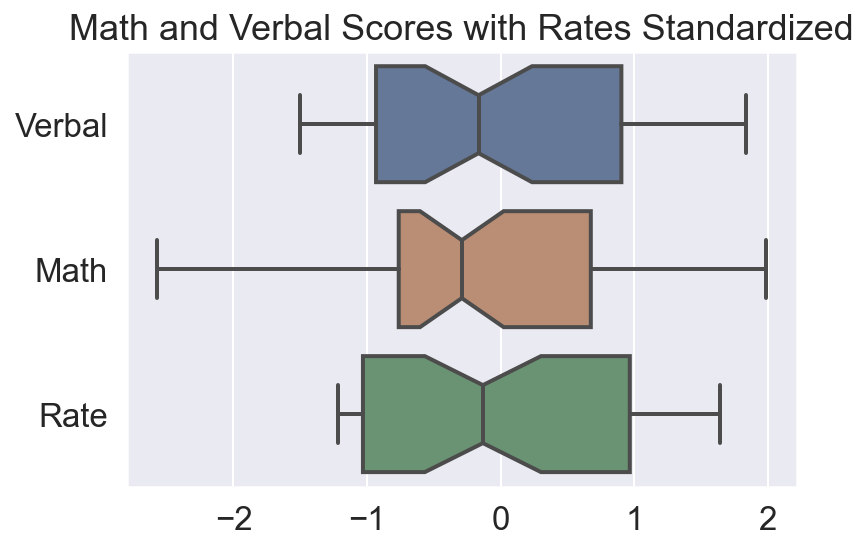

In [23]:
fig, ax = plt.subplots(figsize=(6, 4));
sns.boxplot(data=norm_sat[var_to_plot2], orient='h', fliersize=2, linewidth=2, notch=True,
            saturation=0.5, ax=ax)
ax.set_title('Math and Verbal Scores with Rates Standardized')
plt.show;

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [24]:
av_verb = sat.Verbal.mean()
av_verb


532.0192307692307

In [25]:
satverb = sat[(sat['Verbal']> av_verb)]
satverb

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [26]:
satverb.loc[0:,['State','Verbal']]

,State,Verbal
26,CO,539
27,OH,534
28,MT,539
30,ID,543
31,TN,562
32,NM,551
33,IL,576
34,KY,550
35,WY,547
36,MI,561


In [27]:
satverb.count()

State     24
Rate      24
Verbal    24
Math      24
dtype: int64

In [28]:
# 24 States have sat scores above the mean and as we can see from the chart above almost half
# of the states are above mean of 532. The distribution is fairly symmetrical around the mean
# and we do not have have a big concentration of values on the right or on the left

/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


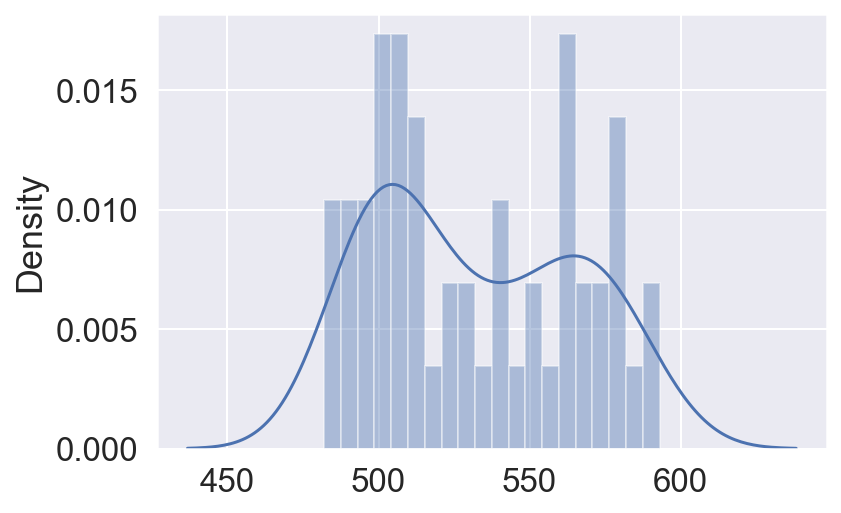

In [29]:
sns.distplot([sat.Verbal], bins=20, kde=True);

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [30]:
med_verb = sat.Verbal.median()
med_verb

526.5

In [31]:
satverbmed = sat[(sat['Verbal']> med_verb)]
satverbmed

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550


In [32]:
satverbmed.loc[0:,['State','Verbal']]

,State,Verbal
19,WA,527
26,CO,539
27,OH,534
28,MT,539
29,WV,527
30,ID,543
31,TN,562
32,NM,551
33,IL,576
34,KY,550


In [33]:
satverbmed.count()

State     26
Rate      26
Verbal    26
Math      26
dtype: int64

In [34]:
# Results are similar as Mean and Median are pretty close but we got 2 
# 2 more states above the median that means that there are a couple more states on the 
# left of the mean and the distribution is not perfectly symmetrical but slightly skewed

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [35]:
VerbminusMath= sat.Verbal - sat.Math


In [36]:
list(sat.columns)

['State', 'Rate', 'Verbal', 'Math']

In [37]:
sat['VerbminusMath']= VerbminusMath
sat.head()

,State,Rate,Verbal,Math,VerbminusMath
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


In [38]:
list(sat.columns)

['State', 'Rate', 'Verbal', 'Math', 'VerbminusMath']

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [39]:
df1= sat[(sat["VerbminusMath"])>0][['State','VerbminusMath']]
df2= df1.sort_values(['VerbminusMath'], ascending=False).head(10)
df2.head(10)

,State,VerbminusMath
27,OH,95
29,WV,15
50,MS,15
45,AR,12
31,TN,9
9,VA,9
32,NM,9
16,DC,8
41,OK,6
8,ME,6


In [40]:
df3= sat[(sat["VerbminusMath"])<0][['State','VerbminusMath']]
df4= df3.sort_values(['VerbminusMath'], ascending=True).head(10)
df4.head(10)

,State,VerbminusMath
21,HI,-30
23,CA,-19
1,NJ,-14
33,IL,-13
44,WI,-12
36,MI,-11
3,NY,-10
47,IA,-10
37,MN,-9
51,All,-8


In [41]:
df2.head(3)


,State,VerbminusMath
27,OH,95
29,WV,15
50,MS,15


In [42]:
df4.head(3)

,State,VerbminusMath
21,HI,-30
23,CA,-19
1,NJ,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [43]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   State          52 non-null     object
 1   Rate           52 non-null     int64 
 2   Verbal         52 non-null     int64 
 3   Math           52 non-null     int64 
 4   VerbminusMath  52 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.2+ KB


In [44]:
sat.corr()

,Rate,Verbal,Math,VerbminusMath
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
VerbminusMath,-0.101412,0.052600,-0.388219,1.000000


In [45]:
# The corr matrix shows a positive and strong corr between Math and Verbal Scores.
# It also shows that Verbal and Math scores are storngly and negatively correlated with the rate
# of sitting the exam in each State

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [46]:
sat.describe(include="all")

,State,Rate,Verbal,Math,VerbminusMath
count,52,52.000000,52.000000,52.000000,52.000000
unique,52,NaN,NaN,NaN,NaN
top,FL,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,37.153846,532.019231,531.500000,0.519231
std,NaN,27.301788,33.236225,36.014975,15.729939
min,NaN,4.000000,482.000000,439.000000,-30.000000
25%,NaN,9.000000,501.000000,504.000000,-6.000000
50%,NaN,33.500000,526.500000,521.000000,0.000000
75%,NaN,63.500000,562.000000,555.750000,4.250000


In [47]:
# count - the total number of values for each column
# unique - the unique number of values for categorical variables
# top - the most frequent value for categorical variables
# freq - the frequency associated with the top value
# mean - the mean of each column for numerical variables
# Std - the standard deviation for each column for numerical variables
# Min - the min value for each column for numerical variables
# 25% - the 25th percentile for each column for numerical variables
# 50% - the 50th percentile for each column for numerical variables
# 75% - the 75th percentile for each column for numerical variables
# Max - the max value for each column for numerical variables

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [48]:
sat.corr()

,Rate,Verbal,Math,VerbminusMath
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
VerbminusMath,-0.101412,0.052600,-0.388219,1.000000


In [49]:
sat.cov()

,Rate,Verbal,Math,VerbminusMath
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
VerbminusMath,-43.552036,27.499623,-219.931373,247.430995


#1 - Covariance is when two variables vary with each other, whereas Correlation is when the change in one variable results in the change in another variable. Both covariance and correlation measure linear relationships between variables.
However the covariance of a variable with itself is its variance and covariance can be a very large positive or negative number wheras correlation goes from -1 to 1
2 - correlation equals covariance divided by the product of the standard deviations therefore if you normalize covariance by standard deviation you have corelation.
3 - The value of the correlation coefficient ranges from -1 to 1 and is not affected by scale so it's more conveniente and easier to read/interpret.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [54]:
drug = pd.read_csv('drug-use-by-age.csv')
drug.head(20)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [55]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     object 
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     object 
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     object 
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

In [56]:
drug.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

#Some frequency variables are objects and not floats hence will require a transformation.
What is more age after 21 is a range and needs cleaning too.
Pandas does not detect missing values as per above as they are expressed as das- and not as NaN hence we will need to create a missing_values = ["-"] when we call the data.
doing that we will have 9 mssing values as per below.

In [57]:
missing_values = ["-"]
drugclean = pd.read_csv('drug-use-by-age.csv',na_values= missing_values)

In [58]:
drugclean.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          1
crack-use                  0
crack-frequency            3
heroin-use                 0
heroin-frequency           1
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         1
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        1
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             2
sedative-use               0
sedative-frequency         0
dtype: int64

In [59]:
# transforming all columns into numeric and replacing non numeric with nan then 
# readding age as age did not change and using coerce will make it a float

In [60]:
drugclean1 = drugclean #.iloc[0::,1::]
drugclean1.apply(pd.to_numeric, errors='ignore')

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [62]:
drugclean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        16 non-null     float64
 8   crack-use                17 non-null     float64
 9   crack-frequency          14 non-null     float64
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         16 non-null     float64
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

In [74]:
drugclean2 = drugclean1.iloc[0:17,0::]
drugclean2

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [75]:
drugclean2.age = pd.to_numeric(drugclean2['age'], errors='ignore')
# drugclean2["age"] = drugclean2["age"].replace("[-,]", "", regex = True).astype("float")
# drugclean2 =drugclean2.loc[10,'age']=22.5
# drugclean2 =drugclean2.loc[11,'age']=24.5
# drugclean2 =drugclean2.loc[12,'age']=27.5
# drugclean2 =drugclean2.loc[13,'age']=32
# drugclean2 =drugclean2.loc[14,'age']=42
# drugclean2 =drugclean2.loc[15,'age']=57
# drugclean2

In [132]:
drugclean2

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [ ]:
#Tried so many times to convert the age columns into a float but got many different errors
# hence moved on. A few things I tried:
# drugclean2['age'].apply(lambda x: float(x.split()[0].replace('-', '')))
# drugclean2['age'] = drugclean2['age'].astype('float64')
# drugclean2 =drugclean2.iloc[10,'age']=22.5
# drugclean2['age']=drugclean2['age'].replace('-',np.NAN).astype('float64')

In [133]:
drugclean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        16 non-null     float64
 8   crack-use                17 non-null     float64
 9   crack-frequency          14 non-null     float64
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         16 non-null     float64
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [134]:
import seaborn as sn
import matplotlib.pyplot as plt

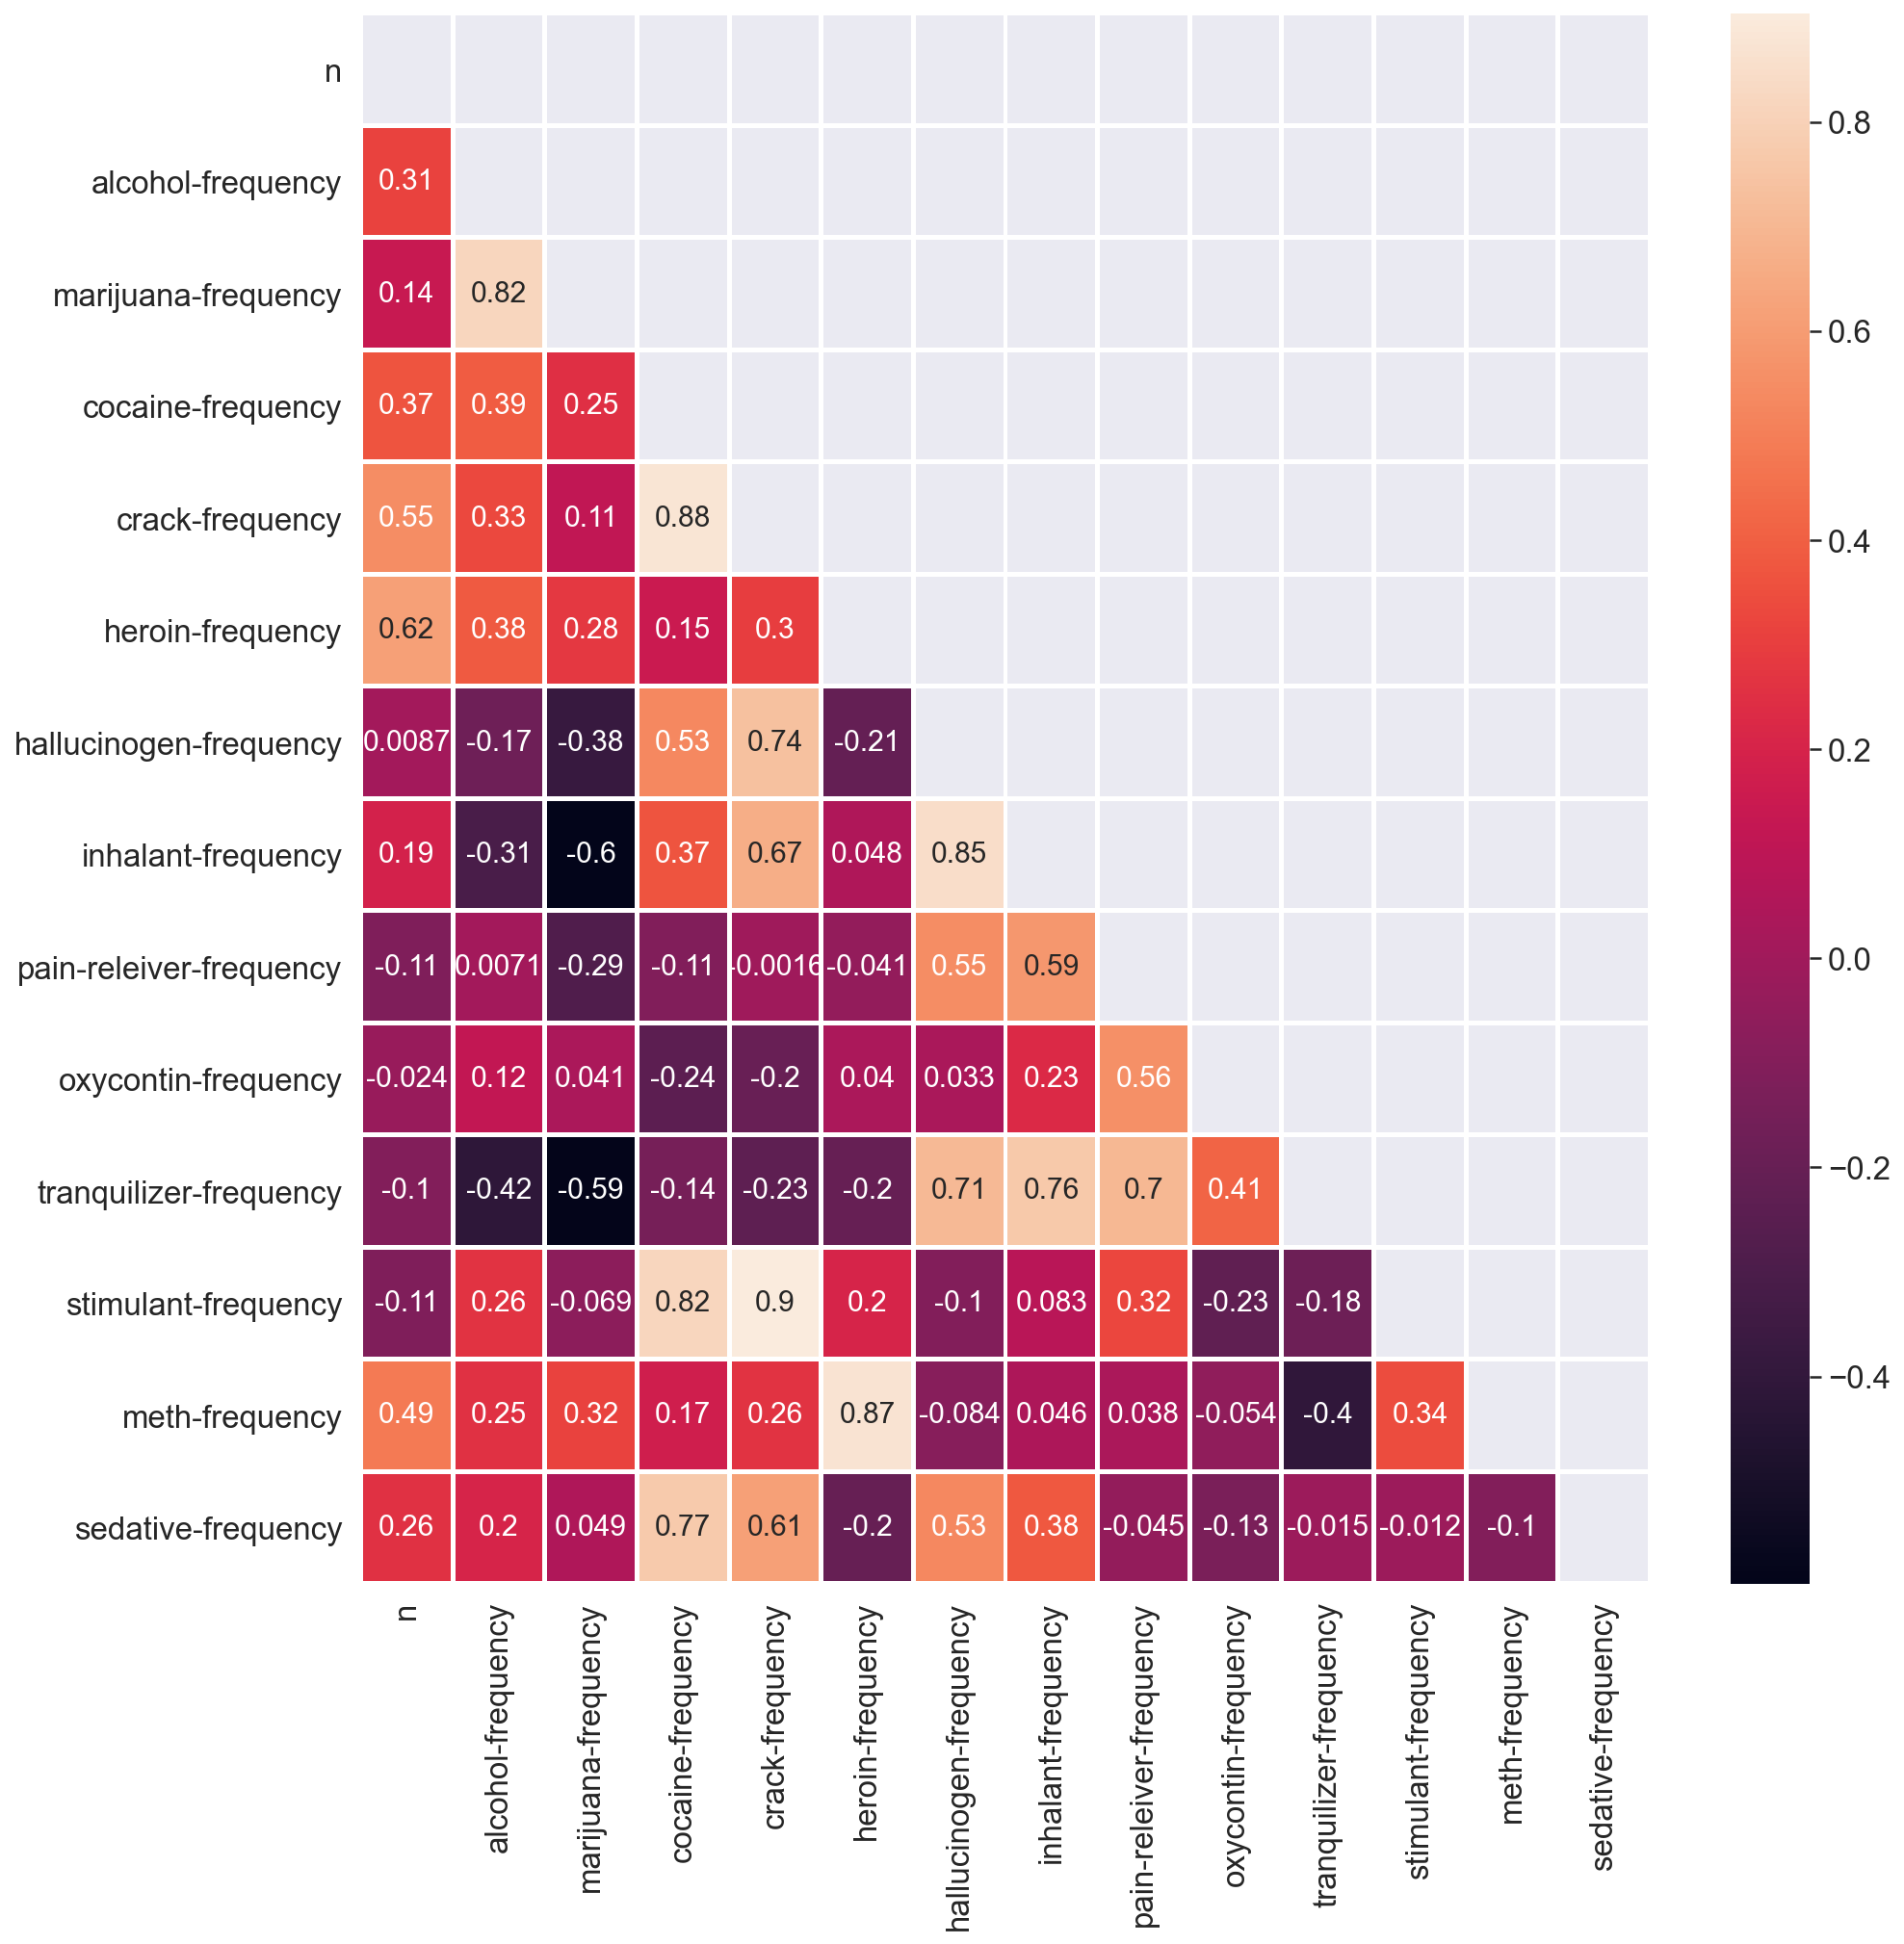

In [157]:
corrMatrix = drugclean2.corr()
fig, ax = plt.subplots(figsize=(15,15))
filter_upper_off = np.zeros_like(corrMatrix.iloc[::2,::2], dtype=np.bool)
filter_upper_off[np.triu_indices_from(filter_upper_off)] = True
sns.heatmap(corrMatrix.iloc[::2,::2], annot=True, linewidths=2, ax=ax,annot_kws={"size": 15},mask=filter_upper_off)
plt.show()

In [ ]:
# Looking at the correlation between frequencies 

In [153]:
drugclean3 = drugclean2.iloc[:17,::2]
drugclean3

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2
5,17,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5
6,18,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4
7,19,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3
8,20,69.7,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5
9,21,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3


In [ ]:
# checking corrlations among % of people who used several drugs in the last 12 months

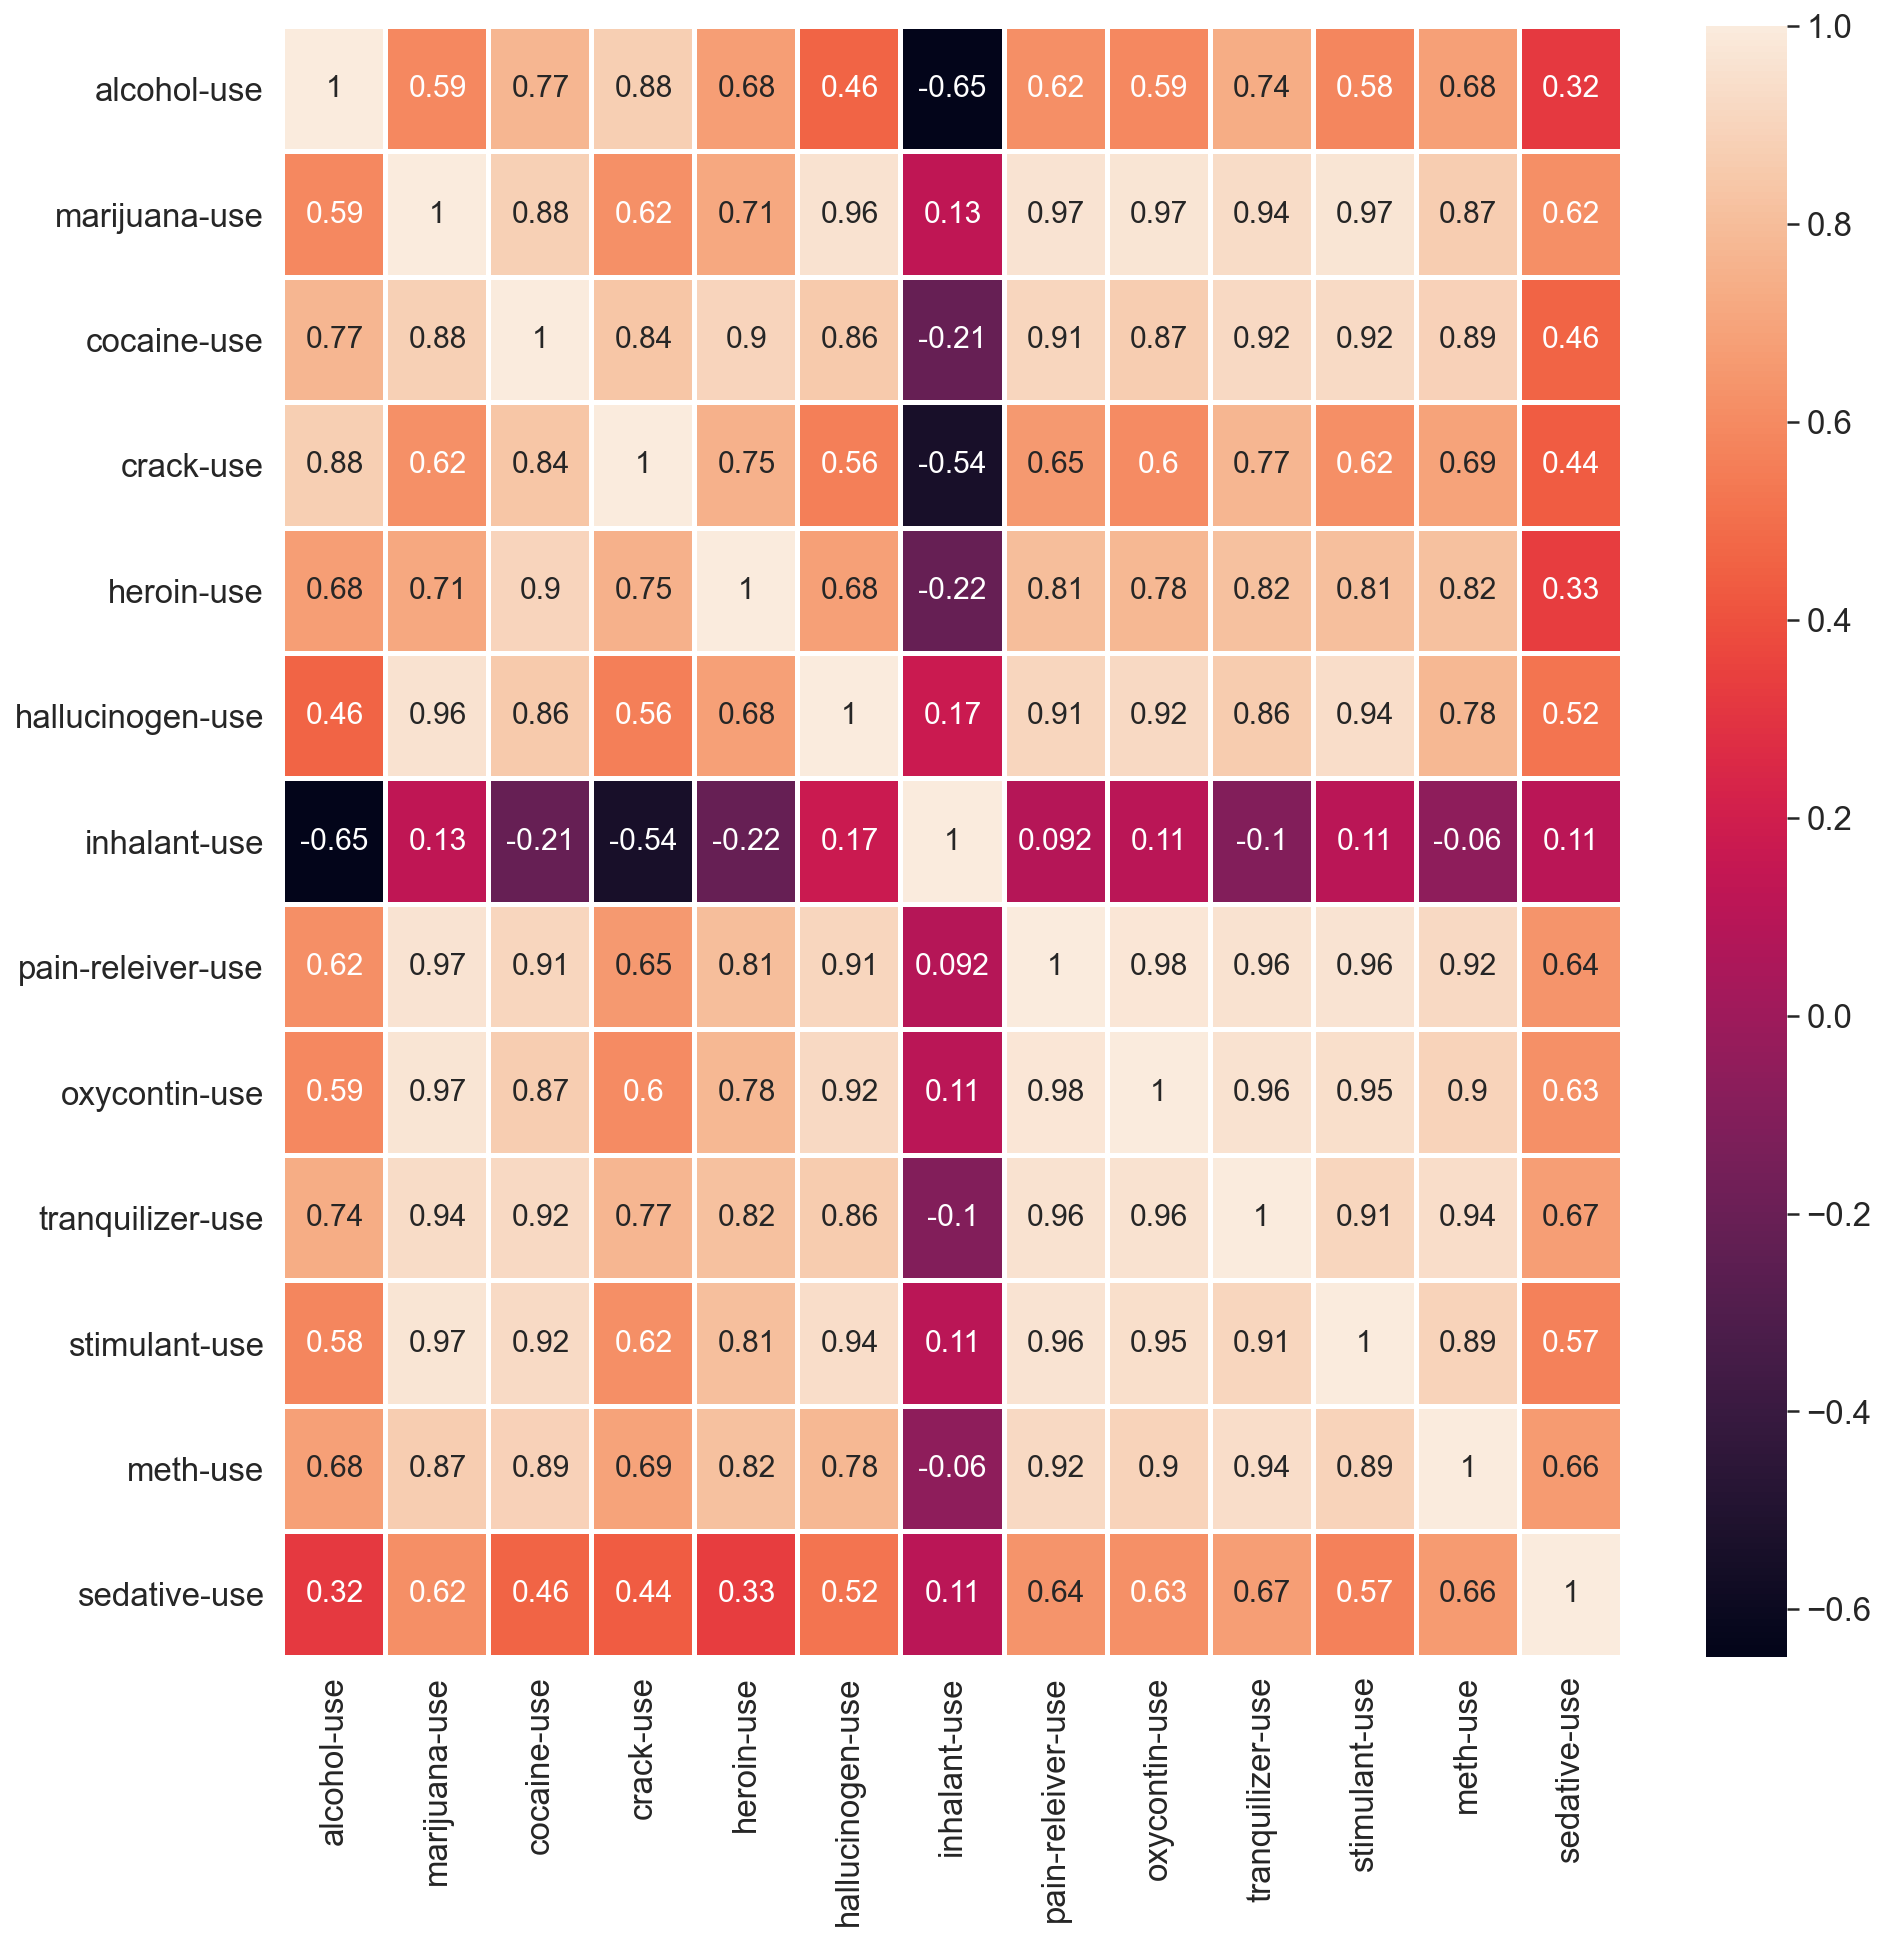

In [194]:
corrMatrix2 = drugclean3.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrMatrix2.iloc[:,:], annot=True, linewidths=2, ax=ax,annot_kws={"size": 15})
plt.show()

In [154]:

drugclean4= drugclean2.iloc[:,3::2]
drugclean4

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,3.0,4.0,5.0,NaN,35.5,52.0,19.0,36.0,24.5,52.0,2.0,NaN,13.0
1,6.0,15.0,1.0,3.0,NaN,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,5.0,24.0,5.5,NaN,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
3,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0
5,13.0,36.0,5.0,21.0,64.0,3.0,4.0,9.0,6.0,7.0,9.0,48.0,6.5
6,24.0,52.0,5.0,10.0,46.0,4.0,4.0,12.0,7.0,12.0,8.0,12.0,10.0
7,36.0,60.0,5.5,2.0,180.0,3.0,3.0,12.0,7.5,4.5,6.0,105.0,6.0
8,48.0,60.0,8.0,5.0,45.0,2.0,4.0,10.0,12.0,10.0,12.0,12.0,4.0
9,52.0,52.0,5.0,17.0,30.0,4.0,2.0,15.0,13.5,7.0,10.0,2.0,9.0


In [155]:
# Plotting variables
drugclean3_mean= drugclean3.mean().sort_values(ascending=False)
drugclean3_mean

alcohol-use          55.429412
marijuana-use        18.923529
pain-releiver-use     6.270588
hallucinogen-use      3.394118
tranquilizer-use      2.805882
cocaine-use           2.176471
stimulant-use         1.917647
inhalant-use          1.388235
oxycontin-use         0.935294
meth-use              0.382353
heroin-use            0.352941
crack-use             0.294118
sedative-use          0.282353
dtype: float64

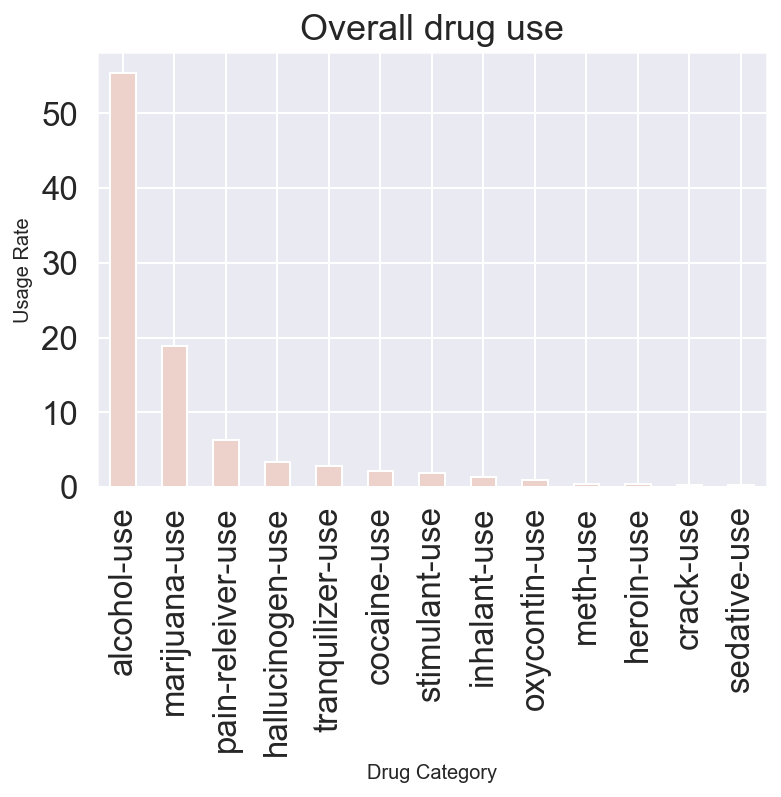

In [156]:
chart1 = drugclean3_mean.plot(kind='bar', legend=None, title='Overall drug use')
chart1.set_xlabel('Drug Category', fontsize=10)
chart1.set_ylabel('Usage Rate', fontsize=10);

In [138]:
# drugcleanfreq = drugclean.iloc[:16,3::2]
# drugcleanfreq

In [139]:
drugcleanfreq_mean= drugclean4.mean().sort_values(ascending=False)
drugcleanfreq_mean

heroin-frequency           73.281250
marijuana-frequency        42.941176
meth-frequency             35.966667
alcohol-frequency          33.352941
stimulant-frequency        31.147059
sedative-frequency         19.382353
crack-frequency            15.035714
oxycontin-frequency        14.812500
pain-releiver-frequency    14.705882
tranquilizer-frequency     11.735294
hallucinogen-frequency      8.411765
cocaine-frequency           7.875000
inhalant-frequency          6.156250
dtype: float64

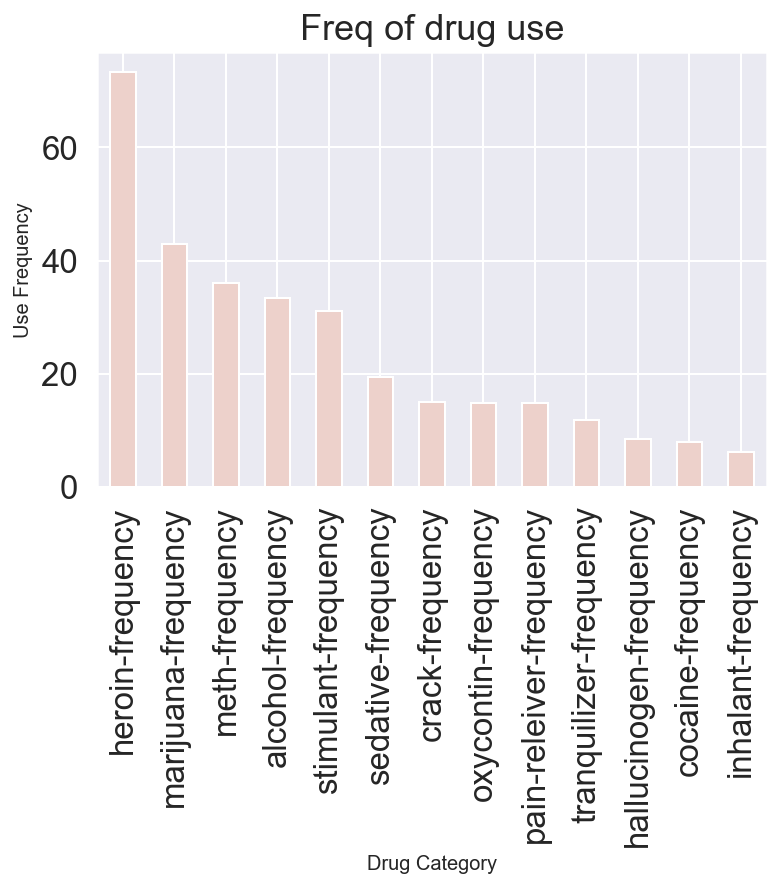

In [161]:
#charting use frequency per drug
chart2 = drugcleanfreq_mean.plot(kind='bar', legend=None, title='Freq of drug use')
chart2.set_xlabel('Drug Category', fontsize=10)
chart2.set_ylabel('Use Frequency', fontsize=10);

Text(0, 0.5, 'Usage Rate')

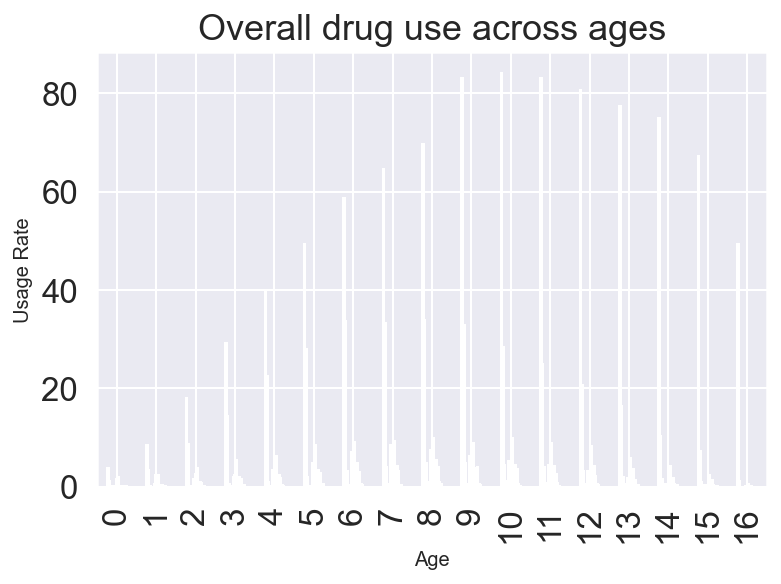

In [160]:
# plotting use across substances by age - strange color that I could not chANGE
chart5 = drugclean3.plot(kind='bar', legend=None, color ='blue', title='Overall drug use across ages')
chart5.set_xlabel('Age', fontsize=10)
chart5.set_ylabel('Usage Rate', fontsize=10)  

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [ ]:
# Question: In an ipothetical drug shop what should the drug sales person recommend to the 
# ipothetical customer given his first drug preference?
# Assuming frequency as a proxy for 'addictiveness' of the substance what recommendation is
# more likely to get the customer back for more and guarantee future cashflows for the drug shop?

# Deliverables: as per the analysis above - frequencies and correlations between differnet 
# drug use and drug frequencies to establish what drugs people consume more alogn with other 
# drugs and which drugs have the highest 'addictiveness'or frequncy.


In [ ]:
alcohol-use          55.429412
marijuana-use        18.923529
pain-releiver-use     6.270588
As per above these 3 drugs are the most used in our population.
For alchool, the Percentage of those in an age group who used alcohol 
in the past 12 month is most correlated (as per corr matrix above) with the percentage
of those who used cocaine, crack and tranquilizers. Among those 3 the highest frequency
per drug is for crack which is the most addictive of the 3.
If the shop gets an alchool user in the shop and wants him to come back he might suggest
first crack as an upsell to the alchool.
For marijuana, the Percentage of those in an age group who used it
in the past 12 month is most correlated with the percentage of those who used
pain releivers, oxycontin,halloucinogens(as per corr matrix above). Among those 3
oxycontin has the highest 'return rate' or additiveness.
if the shop gets a marijuana user in the shop and wants him to come back he might suggest
first pain releivers as an upsell to the drug.

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [150]:
sata=[sat['Rate']]
sata

[0     82
 1     81
 2     79
 3     77
 4     72
 5     71
 6     71
 7     69
 8     69
 9     68
 10    67
 11    65
 12    65
 13    63
 14    60
 15    57
 16    56
 17    55
 18    54
 19    53
 20    53
 21    52
 22    51
 23    51
 24    34
 25    33
 26    31
 27    26
 28    23
 29    18
 30    17
 31    13
 32    13
 33    12
 34    12
 35    11
 36    11
 37     9
 38     9
 39     9
 40     8
 41     8
 42     8
 43     7
 44     6
 45     6
 46     5
 47     5
 48     4
 49     4
 50     4
 51    45
 Name: Rate, dtype: int64]

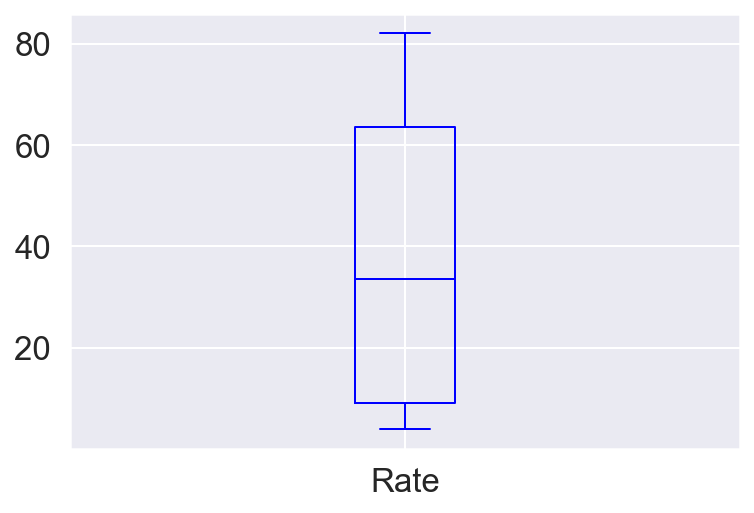

In [162]:
sat.boxplot(column =('Rate'),color='blue');

In [163]:
sat.Rate.mean()

37.15384615384615

In [164]:
sat.Rate.std()

27.301788072869286

In [173]:
sat.Rate.describe()

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

In [183]:
new = sat[(sat['Rate']>37.153846+1.3*27.301788) | (sat['Rate']<37.153846-1.3*27.301788)][['Rate']]
new

,Rate
0,82
1,81
2,79
3,77


In [188]:
satclean =sat.Rate.drop(sat.Rate.index[[0,1,2,3]])
satclean.describe()

count    48.000000
mean     33.604167
std      25.322381
min       4.000000
25%       9.000000
50%      28.500000
75%      56.250000
max      72.000000
Name: Rate, dtype: float64

In [ ]:
#st deviation, median and mean went down as expectd as we removed outliers

In [ ]:
# I would generally define an outlier if above or below 3std deviations from mean but 
# in this case we do not have anything above or below 2std deviation hence
# will make my criteria for outlier stricter and would pick 1stdev or 1.2 as bar to check what values
# are above or below 1stdev from the mean. We can't really define them real outliers but
# at least we get some values which are further up or down from the mean.

In [184]:
from scipy import stats
constrains = sat.select_dtypes(include=[np.number])
constrains1 = constrains.Rate
outliers = constrains1[(np.abs(stats.zscore(constrains)) >1.2).all(axis=1)]
outliers

Series([], Name: Rate, dtype: int64)

In [178]:
# if we use the zscore as criteria we get the same result.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

1. How does the Spearman correlation compare to the Pearson correlation? 
2. Describe clearly in words the process of calculating the Spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [ ]:
# The main difference between the 2 coefficencints is that the Pearson coefficient works with 
# a linear relationship between the two variables whereas the Spearman Coefficient works
# with monotonic relationships as well.Pearson works with raw data values of the variables
# whereas Spearman works with rank-ordered variables


In [ ]:
# rank each data,calculate the difference between ranks which should be then swuared
# to remove negative values. One should then apply the Spearman’s Rank equation
# to calculate the coefficient value .

In [ ]:
# The coefficient (𝑅) will be between a value of -1 and +1 where -1 indicates a perfect negative
# correlation and +1 indicates a perfect positive correlation. 

In [ ]:
# numpy func 

In [195]:
np.corrcoef(sat.Verbal,sat.Math)

array([[1.        , 0.89987085],
       [0.89987085, 1.        ]])

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

In [207]:
sat['Percentile_Rank'] = sat.Rate.rank(pct = True) 
sat


,State,Rate,Verbal,Math,VerbminusMath,Percentile Rank,Percentile_Rank
0,CT,82,509,510,-1,1.000000,1.000000
1,NJ,81,499,513,-14,0.980769,0.980769
2,MA,79,511,515,-4,0.961538,0.961538
3,NY,77,495,505,-10,0.942308,0.942308
4,NH,72,520,516,4,0.923077,0.923077
5,RI,71,501,499,2,0.894231,0.894231
6,PA,71,500,499,1,0.894231,0.894231
7,VT,69,511,506,5,0.855769,0.855769
8,ME,69,506,500,6,0.855769,0.855769
9,VA,68,510,501,9,0.826923,0.826923


In [ ]:
# for califoria is 0.567308

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.

In [ ]:
# did not have time to complete this